<a href="https://colab.research.google.com/github/SyedUsama12/Deep-Learning1/blob/main/Reuters_newswires_Data_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:

import tensorflow as tf
print(tf.__version__)

2.4.1


In [99]:
from keras.datasets import reuters

In [100]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [101]:
print(len(test_data))
print(len(train_data))

2246
8982


In [102]:
test_data

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260

In [104]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

"? ? ? to just br loved and you i've set and broke many was friends seems him see of how and with movies a with know that him see people film guess are of if the some to okay from without old a though a into in that film thing in that of if is scarecrow outside days a found a looks in that film these about in that was to thought 100 him see good he without be all man a character that as it"

In [105]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [106]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [108]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 3.2596 - accuracy: 0.3911 - val_loss: 1.8354 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.6023 - accuracy: 0.6898 - val_loss: 1.3294 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1117 - accuracy: 0.7745 - val_loss: 1.1371 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8738 - accuracy: 0.8215 - val_loss: 1.0179 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6850 - accuracy: 0.8617 - val_loss: 0.9521 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5454 - accuracy: 0.8872 - val_loss: 0.9267 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4481 - accuracy: 0.9050 - val_loss: 0.8921 - val_accuracy: 0.8160
Epoch 8/20
16

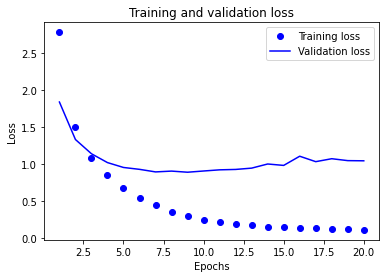

In [109]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

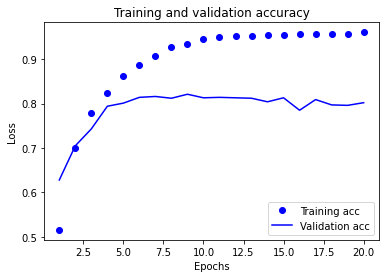

In [112]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [113]:
mode1l = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))
model1.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model1.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))


Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.6730 - accuracy: 0.0400 - val_loss: 3.3509 - val_accuracy: 0.3540
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 3.2548 - accuracy: 0.3492 - val_loss: 2.9435 - val_accuracy: 0.3540
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 2.8433 - accuracy: 0.3489 - val_loss: 2.5981 - val_accuracy: 0.3540
Epoch 4/9
16/16 [==============================] - 1s 35ms/step - loss: 2.5292 - accuracy: 0.3513 - val_loss: 2.3100 - val_accuracy: 0.3550
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 2.2563 - accuracy: 0.3508 - val_loss: 2.1166 - val_accuracy: 0.3560
Epoch 6/9
16/16 [==============================] - 1s 34ms/step - loss: 2.0699 - accuracy: 0.3599 - val_loss: 2.0263 - val_accuracy: 0.3570
Epoch 7/9
16/16 [==============================] - 1s 33ms/step - loss: 1.9670 - accuracy: 0.3551 - val_loss: 1.9641 - val_accuracy: 0.3670
Epoch 8/9
16/16 [===

In [114]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.1851 - accuracy: 0.7939


In [115]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.1861086375779163

In [116]:
predictions = model.predict(x_test)

In [118]:
predictions[0].shape

(46,)

In [119]:
np.sum(predictions[0])


1.0

In [42]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [43]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20


ValueError: ignored

In [16]:
0history_dic=history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

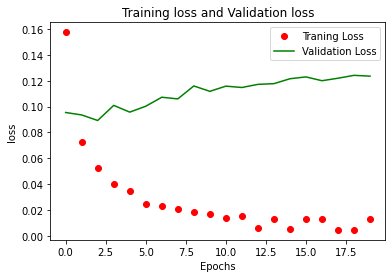

In [19]:
import matplotlib.pyplot as plt
loss = history_dic["loss"]
val_loss=history_dic["val_loss"]
epochs=range(20)
plt.plot(epochs,loss,"bo",label="Traning Loss",color="r")
plt.plot(epochs,val_loss,"b",label="Validation Loss",color ="g")
plt.title("Training loss and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()



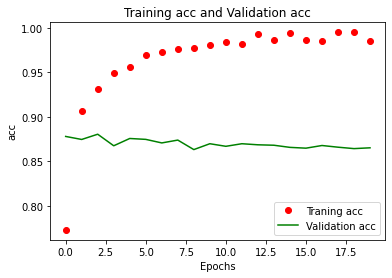

In [18]:
import matplotlib.pyplot as plt
acc = history_dic["accuracy"]
val_acc=history_dic["val_accuracy"]
epochs=range(20)
plt.plot(epochs,acc,"bo",label="Traning acc",color="r")
plt.plot(epochs,val_acc,"b",label="Validation acc",color ="g")
plt.title("Training acc and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()


In [20]:
from keras import models
from keras import layers
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='tanh'))
model1.add(layers.Dense(1, activation='tanh'))
model1.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,epochs=4,batch_size=512)


Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.2180 - accuracy: 0.6980
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0953 - accuracy: 0.8976
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0710 - accuracy: 0.9229
Epoch 4/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0552 - accuracy: 0.9393


In [21]:
result=model1.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.8731


In [22]:
model1.predict(x_test)

array([[ 0.20132339],
       [ 0.9855405 ],
       [ 0.7061312 ],
       ...,
       [ 0.19521426],
       [-0.00618219],
       [ 0.36638066]], dtype=float32)